# Climate Change Belief Analysis
------------------

### Summary
-----------------
With climate change considered a problem throughout the world many companies have taken the initiative to develop enviromentally friendly products and services to aim in lessening their carbon footprint. These companies, however, often find it difficult to guage how their products and services may be percieved and therefore require a means of determining people's views on climate change. By analysing tweets about climate change the sentiment/opinion of the person writing that tweet can be captured and used to provide insight into who is anti or pro climate change and thus guide companies of who to target their products/services to. In this classification problem the aim was to accurately classify sentiments for a collection of tweets about climate change. To do this, LinearSVC, Naive Bayes Multinomial, Random Forest, KNeighbors and Logistic Regression classifier algorithms were used to build models to classify/predict tweet sentiments. Each of the models were assessed using several classification metrics, with the LinearSVC classifier displaying the best scores for the data at hand. We subsequently used a Grid Search to improve on the hyperparameters of LinearSVC in an attempt to improve its classifying ability.
<img src = 'https://media3.giphy.com/media/k4ZItrTKDPnSU/200.gif'></img>

### Contents
---------------
1. [Introduction](#introduction)
2. [Import Packages](#import)
3. [Loading Data and Exploratory Data Analysis (EDA)](#load-data)
4. [Pre-Processing](#preprocess)

    4.1. [Hashtag Extraction](#hashtag)
    
    4.2. [Data Cleaning](#cleaning)
    
    4.3. [Tokenisation](#token)
    
    4.4. [Lemmatization](#lem)
    
    4.5. [Further EDA](#eda2)
    
5. [Model Building](#model-building)

    5.1. [LinearSVC](#linearsvc)
    
    5.2. [Naive Bayes](#naive-bayes)
    
    5.3. [Random Forest](#random-forest)
    
    5.4. [KNeighbors](#kneighbors)
    
    5.5. [Logistic Regression](#logistic-regression)
    
6. [Model Assessment](#model-assess)
7. [Conclusion](#conclusion)

<a id="introduction"></a>
## 1. Introduction
---------------
Climate change is the phenomenon of an increasing number of greenhouse gases within the earth's atmosphere that is accompanied by major shifts in weather patterns. This is largely human-induced and is a result of increased levels of atmospheric carbon dioxide produced by the use of fossil fuels for basic living neccesities as well as large industrial processes. The effects of climate change affect the livelihoods of both people and animals and is experienced via intense drought, storms, heat waves, rising sea levels, melting glaciers and warming oceans. Furthermore, as climate change worsens, dangerous weather events are becoming more frequent or severe.

<img src = 'https://media.giphy.com/media/hPovBcQ3c1g9W/giphy.gif'></img>

Over several years, many companies have attempted to implement strategies around lessening their environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. However, problems they experience include guaging how their products may be recieved based on people's views and opinions of climate change. By determining how people perceive climate change and whether or not they believe it is a real threat, these companies can improve on their market research efforts. Additionally, access to a large collection of consumer sentiments that also spans multiple demographic and geographic categories will influence company insights and their future marketing strategies allowing them to find the right target market to direct their products and efforts toward.

In the context of climate change and sustainable companies, **Team TS1** aim to provide a means for such companies to determine the views or sentiments of people towards climate change. To do this, tweets pertaining to climate change will be looked at and used to train a classification model in order to accurately classify the opinions behind those tweets, into those who believe in climate change and those who do not. This notebook details the work flow of Team TS1 in building, training and assessing different classifier models to provide a suitable solution that can be implemented in future marketing strategies of climate concious companies. 

<a id="import"></a>
## 2. Import Packages
--------------------
To carry out EDA, model building and assessment of model performance

In [1]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scikit Learn 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Extra
from wordcloud import WordCloud
import pickle
import string

<a id="load-data"></a>
## 3. Loading Data and Exploratory Data Analysis (EDA)
-------------------
The data is provided in two files: train.csv and test_with_no_labels.csv and pertains to climate change tweets collected between Apr 27, 2015 and Feb 21, 2018. The train.csv will be used to train the classifier model and the test_no_labels.csv will be used to test the model's classifying accuracy.

### 3.1. Training Dataset
-----------
The training set has 15819 rows and 3 columns, sentiment, made up of integer type data, message, made up of object type data and tweetid, made up of integer type data. Each row represents one observation and each column, a feature. 

**Columns:**
* **message** : the written tweet, on climate change.
* **tweetid** : identifier of a status/message on twitter
* **sentiment** : expresses the view/opinion of climate change (Belief or Disbelief in  climate change, ranges from -1 to 2)
        * -1. Anti - Climate Change: the tweet does not believe in man-made climate change
        * 0. Neutral: the tweet neither supports nor refutes the belief of man-made climate change 
        * 1. Pro - Climate Change: the tweet supports the belief of man-made climate change
        * 2. News : the tweet links to factual news about climate change

In [54]:
# loading and reading train.csv to a Dataframe
train = pd.read_csv('train.csv')

In [3]:
# Overview of the train_df dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [5]:
# View first five rows of train_df
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


### 3.2. Testing Dataset
------------
The testing set has 10546 rows and 2 columns; message and tweetid. The sentiment is to be predicted by classification.

In [4]:
# loading and reading test_with_no_labels.csv to a Dataframe
test = pd.read_csv('test_with_no_labels.csv')

In [6]:
# Overview of the test_df dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [7]:
# View first five rows of test_df
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### 3.3. EDA of Training Data
-----------
**Distribution of the Response**

The distribution of the label variable (sentiment) provides insight into the frequencies per category of the sentiment (-1 to 2) expressed by each tweet. This gives an indication of the more popular vs unpopular opinions on climate change. Given the categorical nature of this variable a countplot and pie chart provides the best insight into the frequencies for each category.

In [3]:
def change_to_words(sentiment):
    if sentiment == -1:
        return 'Anti'
    elif sentiment == 0:
        return 'Neutral'
    elif sentiment == 1:
        return 'Pro'
    else:
        return 'News'

In [4]:
sentiments = train['sentiment'].apply(change_to_words)

C:\Users\Morgan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


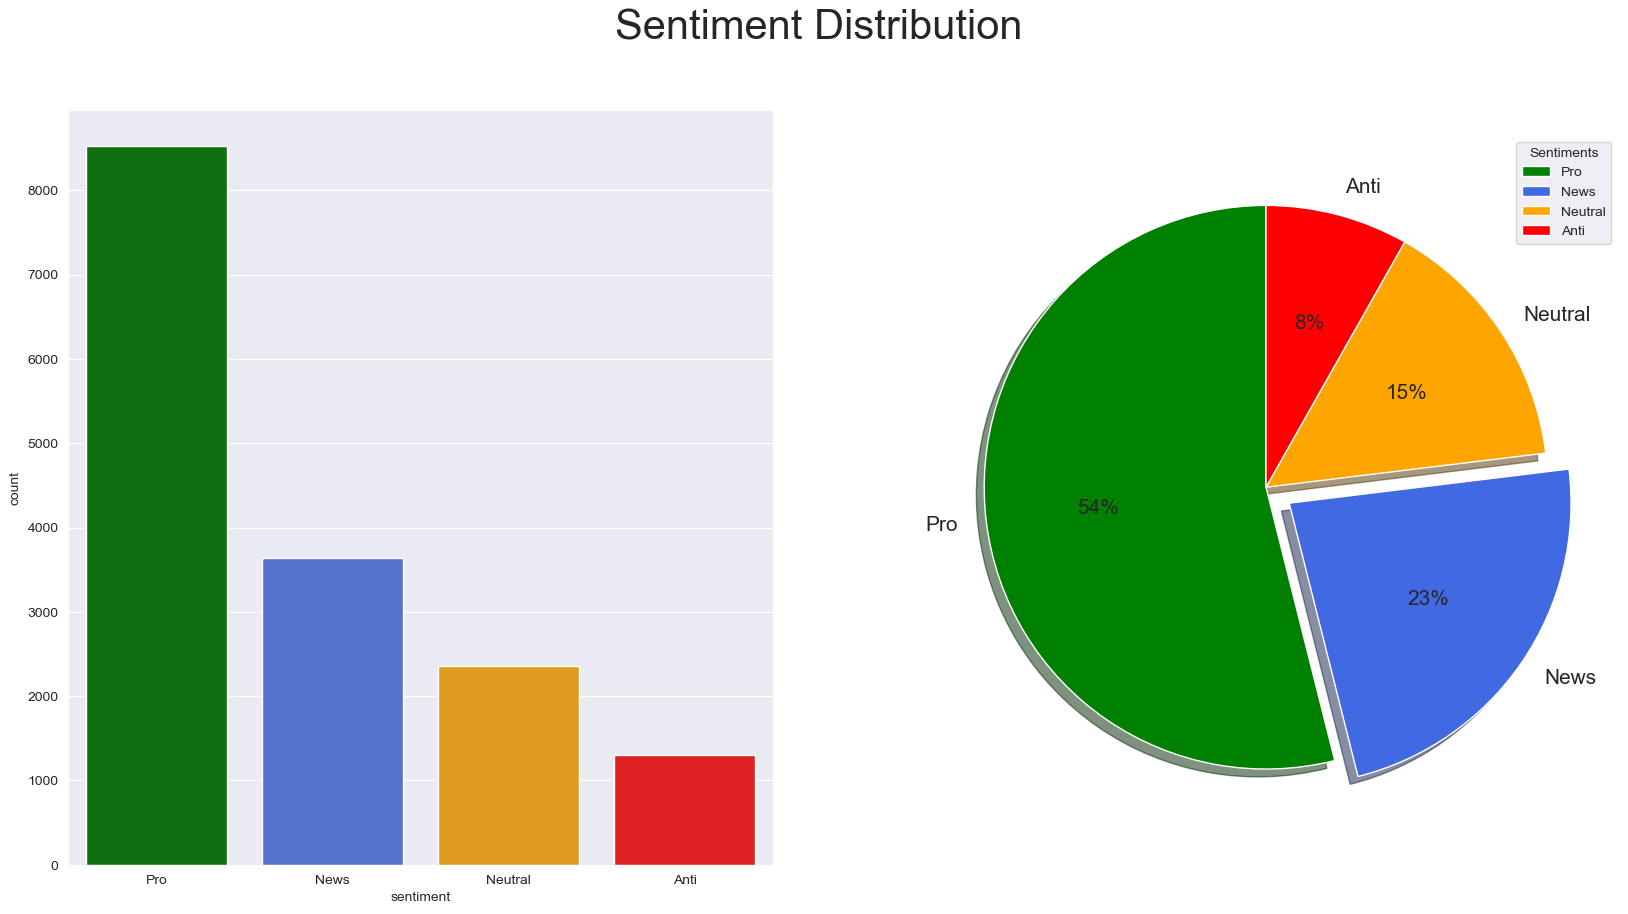

In [5]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(sentiments, ax=axes[0], palette = ['green', 'royalblue', 'orange', 'red'])

labels = ['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(sentiments.value_counts(),
            labels =labels,
            autopct = '%1.0f%%',
            startangle = 90,
            shadow = True,
            explode = (0.0, 0.1, 0.0, 0.0), 
            colors = ['green', 'royalblue', 'orange', 'red'], 
            textprops = {'fontsize': 15})

fig.suptitle('Sentiment Distribution', fontsize = 30)
plt.legend(title = 'Sentiments')
plt.show()

The distribution of sentiments shows a clear difference in the frequencies observed for each sentiment, with the 'Pro' climate change tweets making up majority of the opinions expressed within this data set at over 8000 counts. 'Anti' climate changes tweets make up the lowest number of opinons with just over 1000 counts and with more people having a neutral response towards climate change than disbelieving in it. The number of News/factual tweets is higher than both that of 'Anti' and 'Neutral' views over 3000 views. 

The following table of value counts further describes the difference in frequency between each sentiment.

In [9]:
# Total number of observations for each sentiment
sentiment_counts = pd.DataFrame(train['sentiment'].value_counts())
sentiment_counts['View'] = ['Pro', 'News/Factual', 'Neutral', 'Anti']
sentiment_counts.sort_index(axis = 1)

,View,sentiment
1,Pro,8530
2,News/Factual,3640
0,Neutral,2353
-1,Anti,1296


<a id="preprocess"></a>
## 4. Pre-Processing 
---------
#### <u>Prodecure for Pre-Processing<u>
* Hashtag Extraction
* Data Cleaning
* Tokenisation
* Lemmatization

We will make a copy of the train DataFrame to do pre-processing on. The cleaned data will be used for visuals. The model building will use it's own versions of the DataFrame for testing.

**Reason for this method:**
* To test the model's performance with pre-processing and without pre-processing data
* for more information, please have a look at the article <a href = "https://medium.com/@limavallantin/why-is-removing-stop-words-not-always-a-good-idea-c8d35bd77214">here</a>

In [7]:
# Make a copy of the train dataset to analyse
df_train = train.copy()

<a id="hashtag"></a>
### 4.1 Hashtag Extraction (#)
--------------
Hashtags are used to categorize tweets, so we will be extracting words starting with a `#` to see how many times they occur.

In [13]:
def extract_hashtags(post):
    post_ = [word.replace('#', '') for word in post.split() if word.startswith('#')]
    return post_

In [14]:
df_train['hashtags'] = df_train['message'].apply(extract_hashtags)

In [15]:
df_train.head()

,sentiment,message,tweetid,hashtags
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,[]
1,1,It's not like we lack evidence of anthropogeni...,126103,[]
2,2,RT @RawStory: Researchers say we have three ye...,698562,[]
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[TodayinMaker]
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[ElectionNight]


After all hashtags has been extracted, we can go ahead and clean the data.

<a id="clean"></a>
### 4.2 Data Cleaning
------------

**Noisy information to remove:**
* URL's
* mentions
* stopwords
* punctuations
* numbers and alphanumeric words
* extra whitespaces

Making everything lowercase.

In [8]:
# Remove URL's
def remove_links(df, column):
    regex_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    df[column] = df[column].replace(to_replace = regex_pattern, 
                                    value = '', 
                                    regex = True)
    
# Remove mentions
def remove_mentions(post):
    post_ = ' '.join([word for word in post.split() if not word.startswith('@')])
    return post_

# Remove stopwords
stop_words = stopwords.words('english')
def remove_stopwords(post):
    post = ' '.join([word for word in post.split() if word not in stop_words])
    return post

# Remove punctuations
def remove_punctuation(post):
    post = ''.join([x for x in post if x not in string.punctuation])
    return post

# Remove numbers and alphanumeric words
def return_alpha(post):
    post_ = ' '.join([word for word in post.split() if word.isalpha()])
    return post_

# Remove extra spaces
def remove_spaces(df, column):
    regex_pattern = r'\s\s+'
    df[column] = df[column].replace(to_replace = regex_pattern, 
                                    value = '', 
                                    regex = True)
# Making everything lowercase
df_train['message'] = df_train['message'].str.lower()

In [16]:
remove_links(df_train, 'message')
df_train['message'] = df_train['message'].apply(remove_mentions)
df_train['message'] = df_train['message'].apply(remove_stopwords)
df_train['message'] = df_train['message'].apply(remove_punctuation)
df_train['message'] = df_train['message'].apply(return_alpha)
remove_spaces(df_train, 'message')

In [17]:
df_train.head()

,sentiment,message,tweetid,hashtags
0,1,PolySciMajor EPA chief think carbon dioxide ma...,625221,[]
1,1,Its like lack evidence anthropogenic global wa...,126103,[]
2,2,RT Researchers say three years act climate cha...,698562,[]
3,1,TodayinMaker WIRED pivotal year war climate ch...,573736,[TodayinMaker]
4,1,RT Its racist sexist climate change denying bi...,466954,[ElectionNight]


The tweets needs to be tokenised to help get a better understanding of the context. Let's go ahead and tokenise the tweets. 

<a id="token"></a>
### 4.3 Tokenisation
------------
Tokenization is a way of separating a piece of text into smaller units. Tokens can be either words, characters or subwords.

In [56]:
def tokenize(post):
    post_ = word_tokenize(post)
    return post_

In [19]:
df_train['tokens'] = df_train['message'].apply(tokenize)

In [20]:
df_train.head()

,sentiment,message,tweetid,hashtags,tokens
0,1,PolySciMajor EPA chief think carbon dioxide ma...,625221,[],"[PolySciMajor, EPA, chief, think, carbon, diox..."
1,1,Its like lack evidence anthropogenic global wa...,126103,[],"[Its, like, lack, evidence, anthropogenic, glo..."
2,2,RT Researchers say three years act climate cha...,698562,[],"[RT, Researchers, say, three, years, act, clim..."
3,1,TodayinMaker WIRED pivotal year war climate ch...,573736,[TodayinMaker],"[TodayinMaker, WIRED, pivotal, year, war, clim..."
4,1,RT Its racist sexist climate change denying bi...,466954,[ElectionNight],"[RT, Its, racist, sexist, climate, change, den..."


Next, we will be lemmatizing all the words to their base form.

<a id="lem"></a>
### 4.4 Lemmatization
------
Lemmatizing words to their base form will ensure that words with similar meaning be represented in the same way. 

Stemming is not an option because it looks for similarity in words and often returns words that have no meaning/value. 

In [57]:
lemmatizer = WordNetLemmatizer()

In [58]:
def lemmatize_(post):
    row = []
    for word in post:
        lem = lemmatizer.lemmatize(word)
        row.append(lem)
    post_ = ' '.join(row)
    return post_

In [23]:
df_train['lemmatized'] = df_train['tokens'].apply(lemmatize_)

In [121]:
df_train.head()

,sentiment,message,tweetid,hashtags,tokens,lemmatized
0,1,polyscimajor epa chief think carbon dioxide ma...,625221,[],"[polyscimajor, epa, chief, think, carbon, diox...",polyscimajor epa chief think carbon dioxide ma...
1,1,like lack evidence anthropogenic global warming,126103,[],"[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming
2,2,rt researchers say three years act climate cha...,698562,[],"[rt, researchers, say, three, years, act, clim...",rt researcher say three year act climate chang...
3,1,todayinmaker wired pivotal year war climate ch...,573736,[TodayinMaker],"[todayinmaker, wired, pivotal, year, war, clim...",todayinmaker wired pivotal year war climate ch...
4,1,rt racist sexist climate change denying bigot ...,466954,[ElectionNight],"[rt, racist, sexist, climate, change, denying,...",rt racist sexist climate change denying bigot ...


Now that the pre-processing is done, we can visual and find trends in our data.

<a id="eda2"></a>
### 4.5 Further EDA
------
We will be looking at:
* Most frequently used words
* Hashtags

#### Most Frequently used words:
We will be displaying the top 20 most frequently used words using a WordCloud.

In [24]:
sns.set_style('darkgrid')

In [25]:
def change_to_string(sentiment):
    words = []
    for post in df_train[df_train['sentiment'] == sentiment]['lemmatized']:
        for word in post.split():
            words.append(word)
    text = ' '.join(words)
    return text

In [26]:
anti_climate = change_to_string(-1)
pro_climate = change_to_string(1)
neutral_climate = change_to_string(0)
news_climate = change_to_string(2)

In [31]:
anti_cloud = WordCloud(
    background_color ='white', 
    max_font_size = 130, 
    max_words = 20, 
    colormap = "Reds").generate(anti_climate)

pro_cloud = WordCloud(
    background_color ='white', 
    max_font_size = 130, 
    max_words = 20, 
    colormap = "Greens").generate(pro_climate)

neutral_cloud = WordCloud( 
    background_color ='white', 
    max_font_size = 130, 
    max_words = 20, 
    colormap = "Oranges").generate(neutral_climate)

news_cloud = WordCloud(
    background_color ='white', 
    max_font_size = 130, 
    max_words = 20, 
    colormap = "Blues").generate(news_climate)

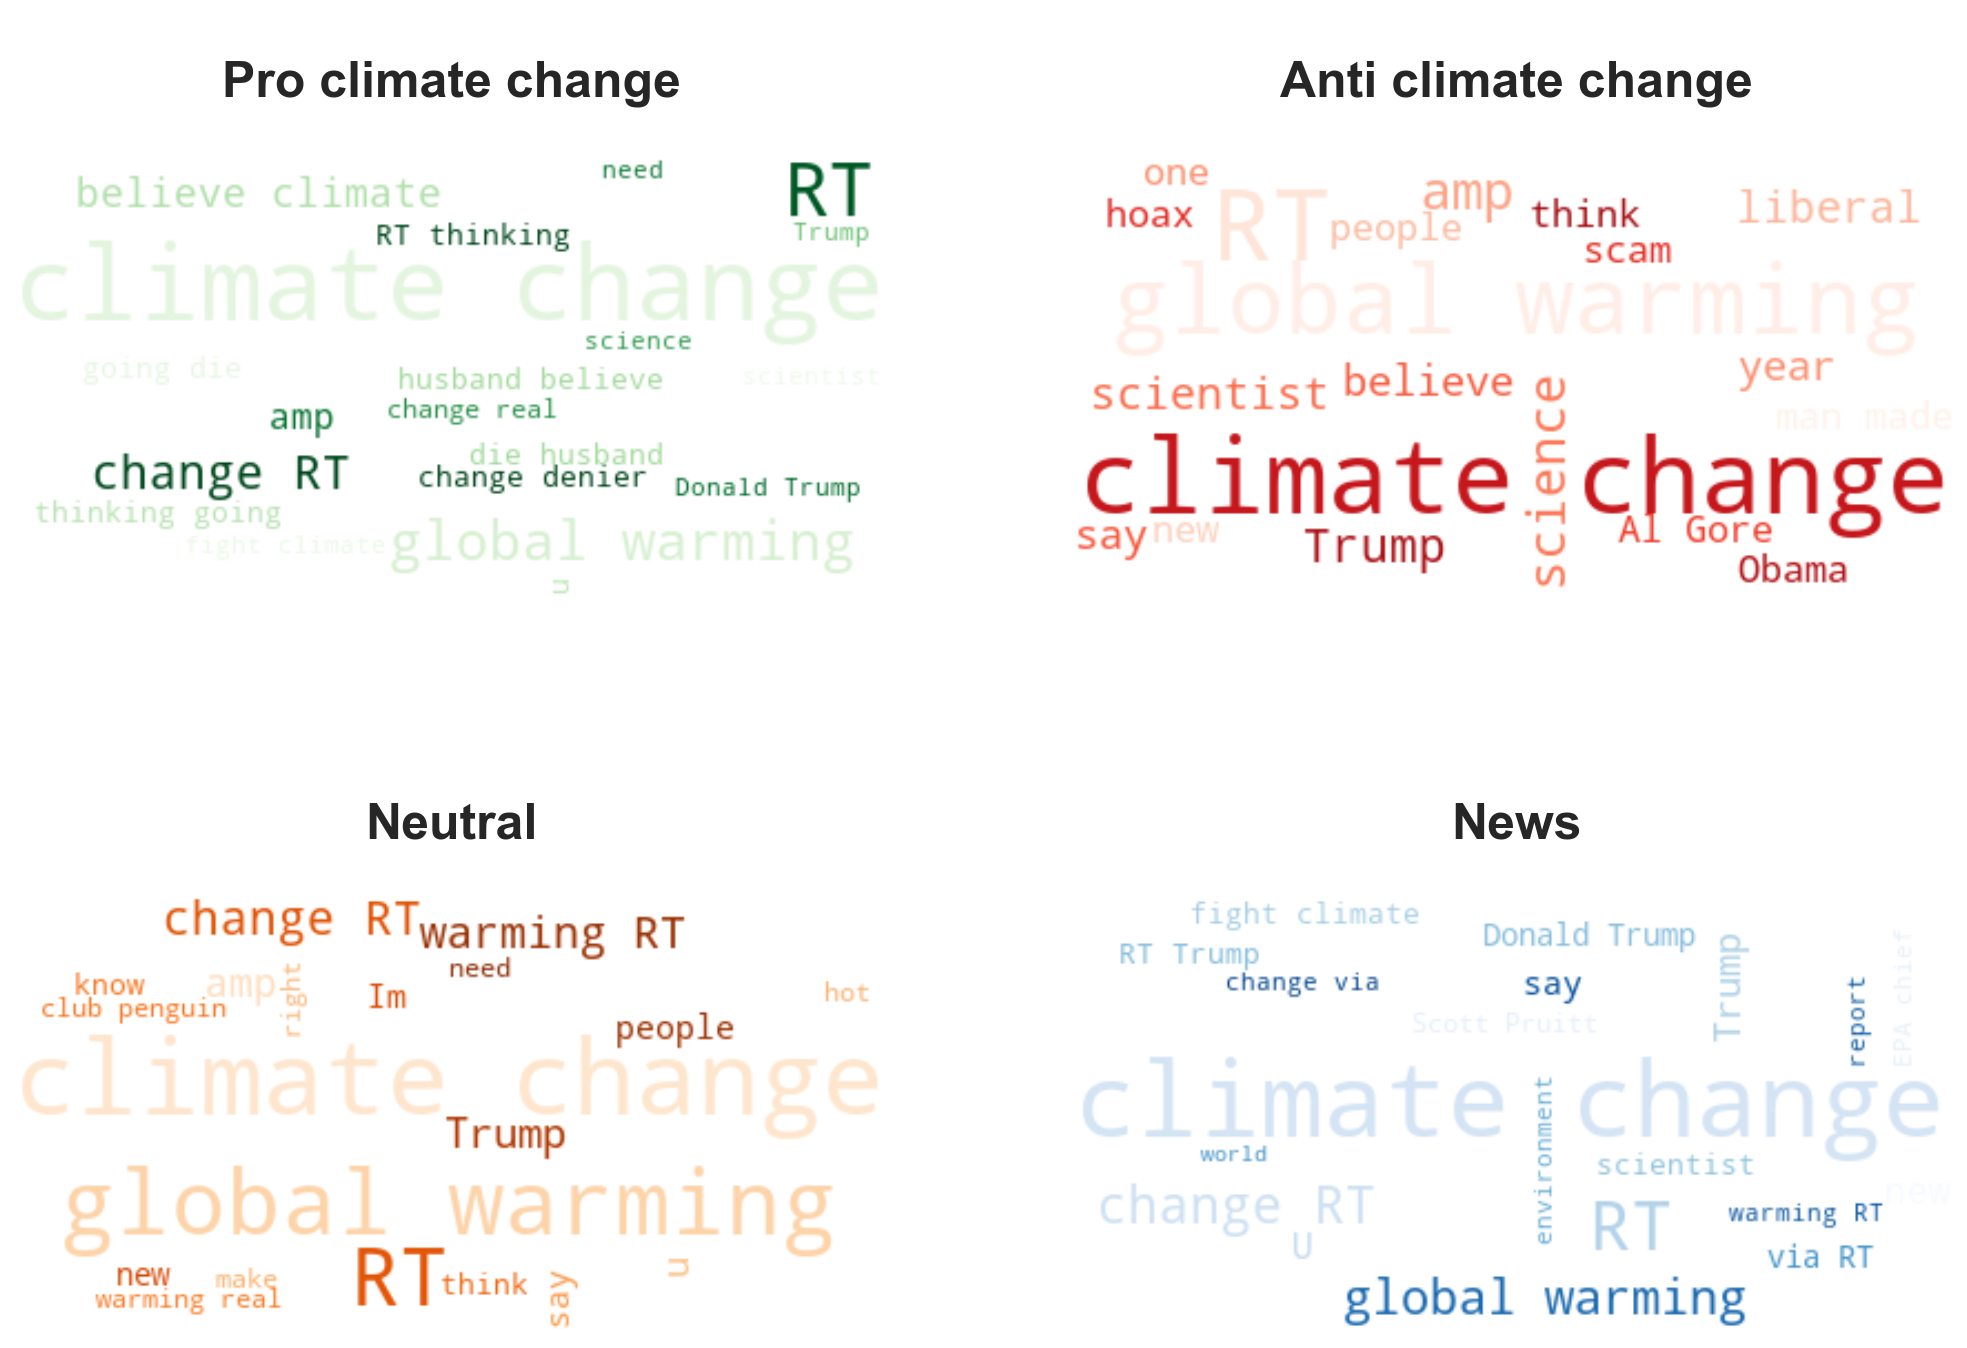

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(35, 25))
ax[0, 0].imshow(pro_cloud, interpolation="bilinear")
ax[0, 1].imshow(anti_cloud, interpolation="bilinear")
ax[1, 0].imshow(neutral_cloud, interpolation="bilinear")
ax[1, 1].imshow(news_cloud, interpolation="bilinear")

ax[0, 0].set_title('\nPro climate change\n', fontsize = 50, fontweight = 'bold')
ax[0, 1].set_title('\nAnti climate change\n', fontsize = 50, fontweight = 'bold')
ax[1, 0].set_title('\nNeutral\n', fontsize = 50, fontweight = 'bold')
ax[1, 1].set_title('\nNews\n', fontsize = 50, fontweight = 'bold')

ax[0, 0].axis("off")
ax[0, 1].axis("off")
ax[1, 0].axis("off")
ax[1, 1].axis("off")
plt.show()

#### Hashtags:
We will be displaying the top 15 hashtags in each sentiment

In [33]:
# Get hashtags for a specific sentiment
def get_hashtags(sentiment):
    hashtags = []

    for hashtag in df_train[df_train['sentiment'] == sentiment]['hashtags']:
        for word in hashtag:
            hashtags.append(word.lower())
            
    return pd.Series(hashtags)

In [47]:
anti = get_hashtags(-1).value_counts()
neutral = get_hashtags(0).value_counts()
pro = get_hashtags(1).value_counts()
news = get_hashtags(2).value_counts()

Text(0.5, 1.0, 'Anti Climate Change Hashtags')

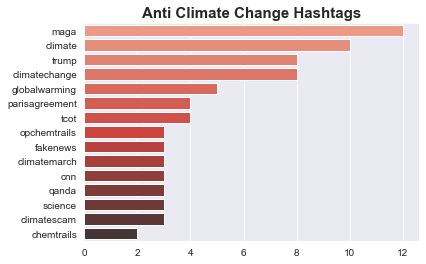

In [42]:
sns.barplot(
    x = anti[:15],
    y = list(anti.index)[:15],
    palette = 'Reds_d'
)

plt.title('Anti Climate Change Hashtags', fontsize = 15, fontweight='bold')


Text(0.5, 1.0, 'Neutral Hashtags')

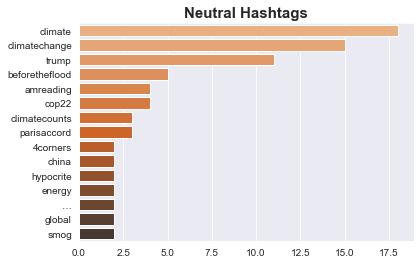

In [44]:
sns.barplot(
    x = neutral[:15],
    y = list(neutral.index)[:15], 
    palette = 'Oranges_d'
)
plt.title('Neutral Hashtags', fontsize = 15, fontweight='bold')

Text(0.5, 1.0, 'Pro Climate Change Hashtags')

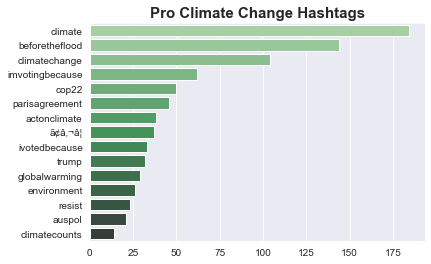

In [48]:
sns.barplot(
    x = pro[:15],
    y = list(pro.index)[:15], 
    palette = 'Greens_d'
)
plt.title('Pro Climate Change Hashtags', fontsize = 15, fontweight='bold')

Text(0.5, 1.0, 'Pro Climate Change Hashtags')

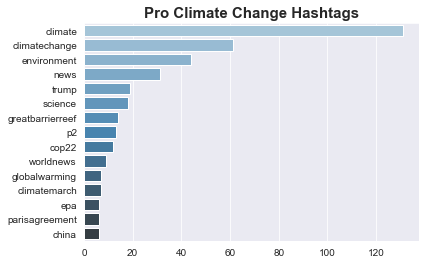

In [49]:
sns.barplot(
    x = news[:15],
    y = list(news.index)[:15], 
    palette = 'Blues_d'
)
plt.title('News Hashtags', fontsize = 15, fontweight='bold')

<a id="model-building"></a>
## 5. Model Building 
---
The model building section is only for model building not for comparison between each models results, that will be covered in the next section.
<br></br>
#### <b><u>Models being used:</u></b>
<ul>
    <li>LinearSVC</li>
    <li>Naive Bayes</li>
    <li>Random Forest</li>
    <li>KNeighbors</li>
    <li>Logistic Regression</li>
</ul>

#### Procedure for the model building section
---
<ol>
    <li>Assign the independent variable and target variable to variables X and y, respectively</li>
    <li>Split the data into a train and validation set</li>
    <li>Create a pipeline to set workflow (contains vectorizer and model)</li>
    <li>Fit the model with the train set</li>
    
</ol>
<b><u>Note:</u></b> Models will be tested with pre-processing and without pre-processing data.
<br></br><br></br>
Each model will built through a Pipeline with a Tfidf-Vectorizer (Term Frequency Inverse Document Frequency). The algorithm for this vectorizer transforms text into a representation of numbers that reflect how significant a word is to a record in a collection or corpus.

The output of the vectorizer can be controlled via several hyperparameters. The `min_df`, `max_df` and `ngram_range` hyperparameters can be adjusted for each classifier to increase prediction capabilities of each model. `Min_df` and `max_df` stands for the frequency threshold of the words to be ignored from the vectorizer output if they appear less than or more than the values set for each respective hyperparameter. The `ngram_range` creates a sequence of N-words in a sentence for each word in a record, where N is an integer that stands for the number of words in the sequence.


In [74]:
# Make a copy of the train DataFrame to test pre_precessing vs non pre-processing
with_pre = train.copy()
without_pre = train.copy()

In [75]:
# Perform pre-processing on the with_pre dataset
remove_links(with_pre, 'message')
with_pre['message'] = with_pre['message'].apply(remove_mentions)
with_pre['message'] = with_pre['message'].apply(remove_stopwords)
with_pre['message'] = with_pre['message'].apply(remove_punctuation)
with_pre['message'] = with_pre['message'].apply(return_alpha)
with_pre['message'] = with_pre['message'].str.lower()
with_pre['message'] = with_pre['message'].apply(tokenize)
with_pre['message'] = with_pre['message'].apply(lemmatize_)

In [76]:
# Declaring the X and y variables

# Without Pre-processing
X = without_pre['message']
y = without_pre['sentiment']

# With Pre-processing
X_ = with_pre['message']
y_ = with_pre['sentiment']

Splitting the data into 75% train and 25% test with a `random_state` of 42

In [78]:
# Without Pre-processing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
# With Pre-processing
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size = 0.25, random_state = 42)

In [ ]:
# Setting up tfidf vectorizer
tfidf_v = TfidfVectorizer(ngram_range = (1, 2), min_df = 2, max_df = 0.8)

After splitting our data, we can begin to use it to train our models.

Firstly, we will be looking at the `LinearSVC` model.

<a id="linearsvc"></a>
### 5.1 LinearSVC
----------
Support Vector Machine (SVM) models are most commonly associated with classification tasks and are found to be among the more accurately classifying algorithms. The SVM algorithm plots each data point in an N-dimensional space, with N being the number of features present within the dataset. There are a number of hyperplanes that exist within the dimensional space with each hyperplane separating each class of data points to a certain extent. The algorithm will subsequently look for the ‘best’ hyperplane which would have the maximum distance between the classes of data points (maximum margin), distinctly separating each class/label.

In this classification problem, a LinearSVC model was used to classify the tweet sentiments. The LinearSVC model uses a liblinear estimator which penalizes the intercept and minimizes the squared hinge loss function, compared to the liblinear estimators of a `SVC()` model that do not penalize the intercept. Liblinear estimators are optimized for a linear case and are able to converge quicker on larger amounts of data and is therefore quick in resolving the problem. `LinearSVC()` uses a One-vs-All multiclass-reduction by splitting the multiclass dataset into multiple binary classification problems.

In [123]:
# Without Pre-processing
lsvc_ = Pipeline([
    ('tfidf', tfidf_v),
    ('lsvc', LinearSVC())
])

# With Pre-processing
lsvc_p = Pipeline([
    ('tfidf', tfidf_v),
    ('lsvc_pre', LinearSVC())
])

In [124]:
lsvc_.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2))),
                ('lsvc', LinearSVC())])

<a id="naive-bayes"></a>
### 5.2 Naive Bayes
-----------
The Naive Bayes Classifier is among the faster computing classification algorithms, is mostly used in text classification/natural language processing problems and in cases where datasets have multiple classes. This algorithm uses Bayes theorem to predict the class of unknown data points using conditional probability, which is a measure of the probability of an event occurring given that another event has occurred. It assumes independence between the features of the data set and uses the Naive Bayesian equation to calculate the posterior probability for each class, with the highest posterior probability being the outcome of prediction. In the case of this classification problem the Multinomial variant of the Naive Bayes classifier built for sentiment prediction. This classifier assumes a feature vector where a given term is represented by the number/frequency of times it appears, the algorithm then determines the probability for each term and the predicted outcome is based on the highest probability. The main hyperparameter associated with the Multiomial Naive Bayes classifier is alpha (Laplace smoothing factor) that prevents the model from setting null probabilities when the frequency is zero while larger values of alpha assign higher probabilities to the missing features.

In [125]:
# Without Pre-processing
mnb_ = Pipeline([
    ('tfidf', tfidf_v),
    ('mnb', MultinomialNB())
])

# With Pre-processing
mnb_p = Pipeline([
    ('tfidf', tfidf_v),
    ('mnb_pre', MultinomialNB())
])

In [126]:
mnb_.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2))),
                ('mnb', MultinomialNB())])

<a id="random-forest"></a>
### 5.3 Random Forest
------------
Next, we built a model using the Random Forest classifier. This classifier creates a set of decision trees from randomly selected subsets of the training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

In [127]:
# Without Pre-processing
rf_ = Pipeline([
    ('tfidf', tfidf_v),
    ('rf', RandomForestClassifier())
])

# With Pre-processing
rf_p = Pipeline([
    ('tfidf', tfidf_v),
    ('rf_pre', RandomForestClassifier())
])

In [128]:
rf_.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2))),
                ('rf', RandomForestClassifier())])

<a id="kneighbors"></a>
### 5.4 KNeighbors
------------
The KNeighbors Classifier uses the K Nearest Neighbors (KNN) algorithm to classify data. This algorithm is non-parametric and works by classifying the query point as the class of the majority of representatives among the nearest neighbors of the query/test data point (i.e if most of the query point’s neighbors are Class x, then the query point will be classified as Class x).

In [129]:
# Without Pre-processing
knn_ = Pipeline([
    ('tfidf', tfidf_v),
    ('knn', KNeighborsClassifier())
])

# With Pre-processing
knn_p = Pipeline([
    ('tfidf', tfidf_v),
    ('knn_pre', KNeighborsClassifier())
])

In [130]:
knn_.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2))),
                ('knn', KNeighborsClassifier())])

<a id="logistic-regression"></a>
### 5.5 Logistic Regression
------------
Logistic Regression is typically used for classification problems where there are two outcomes (binary). The model measures the relationship between the dependent variable (label) and one or more independent variables (our features), by estimating the probability of the first class (class 1). These probabilities are then transformed into binary values, by the logistic/sigmoid function, in order to actually make a prediction. This function is an S-shaped curve that takes any real-valued number and maps it into a value between the range of 0 and 1.

In [131]:
# Without Pre-processing
lr_ = Pipeline([
    ('tfidf', tfidf_v), 
    ('lr', LogisticRegression())
])

# With Pre-processing
lr_p = Pipeline([
    ('tfidf', tfidf_v), 
    ('lr_pre', LogisticRegression())
])

In [132]:
lr_.fit(X_train, y_train)

C:\Users\Morgan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2))),
                ('lr', LogisticRegression())])

Now we move to the Model Assessment section.

<a id="model-assess"></a>
## 6. Model Assessment 
--------------
Comparing pre-processing to non pre-processing model's preformance using their `precision`, `recall` and `f1` scores
<br></br>
- The model that performed the best will go through a hyperparameter tuning phase to see if the model's performance can improve.
<br></br><br></br>
The **Precision** score refers to the percentage of predictions that are correct (i.e out of all points classified as class one how many were correctly classified as class one). **Recall** scores reflect the fraction of each label that was correctly identified (i.e out of all true class ones how many were correctly predicted as class one). The **f1** score is a combination of both precision and recall, as a weighted harmonic mean and is useful for imbalanced classification. It falls between a range of 0 and 1.00, with a value of 1.00 indicating a model with perfect precision and recall and values close to zero suggesting a model with poor precision and recall. This score is also commonly used to compare classifier models.

### 6.1. Preprocessing VS No Preprocessing
---
Firstly, we get predictions for all models with preprocessing and no preprocessing data then compare their scores.

In [133]:
# Without Pre-processing
lsvc_y = lsvc_.predict(X_test)
mnb_y = mnb_.predict(X_test)
rf_y = rf_.predict(X_test)
knn_y = knn_.predict(X_test)
lr_y = lr_.predict(X_test)


The reason why we are fitting the pre-processing models here is that if we train both models in the model building section, one of them will override the other.

This can cause a dimensional error where the number of features in the train and validation sets are not equal.

In [134]:
# With Pre-processing
# Fit models
lsvc_p.fit(X_train_, y_train_)
mnb_p.fit(X_train_, y_train_)
rf_p.fit(X_train_, y_train_)
knn_p.fit(X_train_, y_train_)
lr_p.fit(X_train_, y_train_)

# Predict
lsvc_yp = lsvc_p.predict(X_test_)
mnb_yp = mnb_p.predict(X_test_)
rf_yp = rf_p.predict(X_test_)
knn_yp = knn_p.predict(X_test_)
lr_yp = lr_p.predict(X_test_)

C:\Users\Morgan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
# Without Pre-processing
metrics = {
    'precision': [
        precision_score(y_test, lsvc_y, average = 'weighted'),
        precision_score(y_test, mnb_y, average = 'weighted'),
        precision_score(y_test, rf_y, average = 'weighted'),
        precision_score(y_test, knn_y, average = 'weighted'),
        precision_score(y_test, lr_y, average = 'weighted')
    ],
    'recall': [
        recall_score(y_test, lsvc_y, average = 'weighted'),
        recall_score(y_test, mnb_y, average = 'weighted'),
        recall_score(y_test, rf_y, average = 'weighted'),
        recall_score(y_test, knn_y, average = 'weighted'),
        recall_score(y_test, lr_y, average = 'weighted')
    ],
    'f1': [
        f1_score(y_test, lsvc_y, average = 'weighted'),
        f1_score(y_test, mnb_y, average = 'weighted'),
        f1_score(y_test, rf_y, average = 'weighted'),
        f1_score(y_test, knn_y, average = 'weighted'),
        f1_score(y_test, lr_y, average = 'weighted')
    ]
}

In [136]:
# With Pre-processing
metrics_pre = {
    'precision': [
        precision_score(y_test_, lsvc_yp, average = 'weighted'),
        precision_score(y_test_, mnb_yp, average = 'weighted'),
        precision_score(y_test_, rf_yp, average = 'weighted'),
        precision_score(y_test_, knn_yp, average = 'weighted'),
        precision_score(y_test_, lr_yp, average = 'weighted')
    ],
    'recall': [
        recall_score(y_test_, lsvc_yp, average = 'weighted'),
        recall_score(y_test_, mnb_yp, average = 'weighted'),
        recall_score(y_test_, rf_yp, average = 'weighted'),
        recall_score(y_test_, knn_yp, average = 'weighted'),
        recall_score(y_test_, lr_yp, average = 'weighted')
    ],
    'f1': [
        f1_score(y_test_, lsvc_yp, average = 'weighted'),
        f1_score(y_test_, mnb_yp, average = 'weighted'),
        f1_score(y_test_, rf_yp, average = 'weighted'),
        f1_score(y_test_, knn_yp, average = 'weighted'),
        f1_score(y_test_, lr_yp, average = 'weighted')
    ]
}

In [149]:
no_preprocess = pd.DataFrame(metrics, index = [
    'LinearSVC', 
    'Naive Bayes', 
    'Random Forest', 
    'KNeighbors', 
    'Logistic Regression'])

with_preprocess = pd.DataFrame(metrics_pre, index = [
    'LinearSVC', 
    'Naive Bayes', 
    'Random Forest', 
    'KNeighbors', 
    'Logistic Regression'])

In [148]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [154]:
print('\t\tNo Preprocessing\t\t\t\t\tPreprocessing')
display_side_by_side(no_preprocess, with_preprocess)

		No Preprocessing					Preprocessing


,precision,recall,f1
LinearSVC,0.760004,0.765866,0.757522
Naive Bayes,0.772611,0.680657,0.612546
Random Forest,0.725494,0.716561,0.688665
KNeighbors,0.656042,0.654614,0.653468
Logistic Regression,0.748897,0.749178,0.728501
,precision,recall,f1
LinearSVC,0.716640,0.725158,0.716609
Naive Bayes,0.753539,0.676359,0.613004
Random Forest,0.700532,0.694564,0.671226
KNeighbors,0.637764,0.635651,0.635503


From the above classification metric scores, it can be seen that the un-processed tweets were classified with higher precison and recall as opposed to the tweets that were processed. Comparing each of the model's f1 scores is a common practice in model assessment and is thus used here to justify the best mmodel out of the five tested. 
As observed from the above tables,`LinearSVC` has the best performance with the highest f1 score (indicating a model with good recall and precision). As such, this model will undergo hyperparameter tweaking with the aim of improving its classification abilities. 

### 6.2. Hyperparameter tuning
---
#### **Procedure**
* Create a new pipeline for the model to ensure no issues will occur
* Create a dictionary with a combination of values that will be test on different hyperparameter
* Assign the pipeline and dictionary to `GridSearchCV` as arguments
* Fit the model
* Get predictions
* Observe performance using the **Classification Report** and **Confusion Matrix**
<br></br><br></br>

In an attempt to improve the prediction accuracy of the `LinearSVC()` classifier, the vectorizing, model building and model tuning will be applied to it using a Grid Search (`GridSearchCV(()`), in order to find the optimal hyperparameters that performs best with the input data for the classifier model. GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method using a 'fit and score' method. K-folds of k = 20 will be used for cross validation for the model. The data set is divided into k number of subsets/folds, the model is then trained on k-1 folds and the remaining fold is used to test the model's effectiveness. The model will iterate through each fold until all folds has served as a test set and the average k recorded accuracy (cross-validation accuracy) is used as the performance metric for the model.

The `LinearSVC()` classifier consists of several tunable hyperparameters that can be used to improve on it’s classifying capabilities, here the hyperparameters `C` and `class_weight` will be set during model building. The `C` hyperparameter controls the penalty strength, where small `C` values increase the regularization strength which creates simple models that under-fits the data and big `C` values lowers the regularization strength which increases the model’s complexity resulting in overfitting of the data but cross validation reduces the chance of the model to underfit or overfit . The `class_weight` hyperparameter handles a data imbalance, with ‘balanced’ meaning classes will be automatically weighted inversely proportional to how frequently they appear in the data. The `max_iter` hyperparameter handles the maximum number of iterations to be run.

In [170]:
lsvc_final = Pipeline([
    ('tfidf', tfidf_v),
    ('lsvc_f', LinearSVC())
])

In [171]:
lsvc_params = {
    'lsvc_f__C': [0.5, 1],
    'lsvc_f__max_iter': [1000, 2000], 
    'lsvc_f__class_weight': ['balanced']
}

In [172]:
lsvc_cv = GridSearchCV(
    lsvc_final,
    param_grid = lsvc_params,
    scoring = 'f1_weighted',
    cv = 20
)

In [173]:
lsvc_cv.fit(X_train, y_train)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.8, min_df=2,
                                                        ngram_range=(1, 2))),
                                       ('lsvc_f', LinearSVC())]),
             param_grid={'lsvc_f__C': [1, 0.5],
                         'lsvc_f__class_weight': ['balanced'],
                         'lsvc_f__max_iter': [1000, 2000]},
             scoring='f1_weighted')

In [174]:
lsvc_cv.best_params_

{'lsvc_f__C': 0.5,
 'lsvc_f__class_weight': 'balanced',
 'lsvc_f__max_iter': 1000}

In [175]:
lsvc_cv.best_score_

0.7447400065751114

In [176]:
y_pred = lsvc_cv.predict(X_test)

#### Classification Report
---
A classification report displays several important classification metrics for each label being predicted by the model. Precision, recall, f1, and support scores are all included in this report. The support score references the true number of instances of the class in the specified dataset. The classification report further includes the accuracy, macro and weighted average scores for each metric. The accuracy score relflects the overall performance of model as a ratio of correctly predicted observation to the total observations, however this metric gives the best insight into symmetric data One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets, therefore, other parameters need to be evaluated as well in order to determine the performance of your model.The macro average score refers to the unweighted mean of the metric for each label to being calculated independently to find the unweighted mean. Finally the weighted average score is the metric calculated for each label/class, and finds their average weighted support.

In [186]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict = True)).transpose()

,precision,recall,f1-score,support
-1,0.659649,0.559524,0.605475,336.000000
0,0.559546,0.541133,0.550186,547.000000
1,0.831078,0.817723,0.824346,2178.000000
2,0.748497,0.835570,0.789641,894.000000
accuracy,0.761568,0.761568,0.761568,0.761568
macro avg,0.699693,0.688488,0.692412,3955.000000
weighted avg,0.760293,0.761568,0.759989,3955.000000


As we can see above, the score has increased to 0.759989

#### Confusion Matrix
---
The confusion matrix simply depicts the number of correctly classified and incorrectly classified labels. The diagonal elements of the matrix represent the number ofdata points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. Higher diagonal values are indicative of many correctly predicted data points.

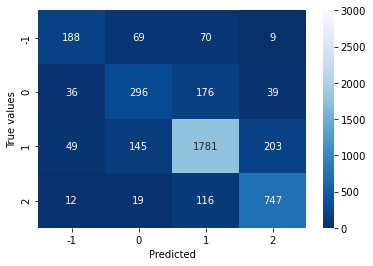

In [187]:
sns.heatmap(
    confusion_matrix(y_test, y_pred), 
    cmap = "Blues_r", 
    xticklabels = lsvc_cv.classes_, 
    yticklabels = lsvc_cv.classes_, 
    vmin = 0, 
    vmax = 3000, 
    annot = True, 
    fmt = 'g'
)

plt.ylabel('True values')
plt.xlabel('Predicted')
plt.show()

#### Pickle Model
---
Pickling the model makes it reusable.

In [ ]:
save_path_lr = 'linearsvc.pkl'

In [33]:
pickle.dump(lsvc_cv, open(save_path_lsvc,'wb'))

#### Test Set
---
No pre-processing is required for the test set, as stated above the model performed better without pre-processing.

In [113]:
y_pred_ = lsvc_cv.predict(test['message'])

In [114]:
submission = pd.DataFrame({'tweetid': test['tweetid'], 
                           'sentiment': y_pred_})

In [115]:
submission

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,-1
10542,875167,1
10543,78329,2
10544,867455,0


In [116]:
submission.to_csv('submission.csv', index = False)

<a id="conclusion"></a>
## 7. Conclusion
--------


Of the five models tested in sentiment analysis and classification of climate change tweets, the model with the best results (f1 score) was found to be the LinearSVC(). This is likely due to the LinearSVC() model looking at the interactions between the word frequencies of the vectorizer output, as well as being better suited to unstructured and semi-structured data like text. The best hyperparameters of LinearSVC() were a C value of 0.5 and a max_iter value of 1000, with a class_weight set to 'balanced'. This model's sentiment predictions scored an f1 score of 0.74810 on Kaggle against the true sentiments of the test data set, as this score is closer to 1 than 0, it can be suggested that the chosen 'best' model is higher in its precision and recall and is thus fairly effective in predicting/classifying tweet sentiments. This model can therefore be suggested as an approach companies can take to determine those who are anti- or pro- climate change and use this information to establish the development and marketing of their climate friendly products and services.

While all tested model's displayed decent f1 scores, future considerations for sentiment classification of this nature can include assessing what classifier algorithms are best suited to the data at hand, as well as, running a grid search on all tested models to find optimal hyperparameters that improve on classification metric scores. More care can also be taken in the cleaning up of tweet datasets which in turn may also improve metric scores.


